# Portfolio assignment week 7
## 1. Bagging vs Boosting

The scikit-learn library provides several options for bagging and boosting. It is possible to create your own boosting model based on a base model. For instance, you can create a tree based bagging model. In addition, scikit-learn provides AdaBoost. For XGBoost it is best to use the xgboost library.

Based on the theory in the accompanying notebook, create a bagging, boosting and dummy classifier. Test these classifiers on the breast cancer dataset. Go through the data science pipeline as you've done before:

Try to understand the dataset globally.
Load the data.
Exploratory analysis
Preprocess data (skewness, normality, etc.)
Modeling (cross-validation and training). (Create several bagging classifiers with different estimators.)
Evaluation (Use the evaluation methods as described in the previous lessons. Then compare the different models.)
Try to understand why some methods perform better than others. Try different configurations for your bagging and boosting models.

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn import tree
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [79]:
data_brc_bb = pd.read_csv('datasets_DS3\\breast-cancer.csv')

data_brc_bb.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Inspecting the breast cancer dataset using the column variable diagnosis and checking the variable elements of the rows

In [80]:
data_brc_bb['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [81]:
# Cleaning and modifying the data
data_brc_bb_clean = data_brc_bb.drop('id',axis=1)

In [82]:
# Mapping Benign to 0 and Malignant to 1 
data_brc_bb_clean['diagnosis'] = data_brc_bb_clean['diagnosis'].map({'M':1,'B':0})

### Correlations of different elements

In [83]:
corr_mat = data_brc_bb_clean.corr()
# Strip out the diagonal values for the next step
for x in range(len(data_brc_bb_clean.columns)):
    corr_mat.iloc[x,x] = 0.0
    
corr_mat

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,0.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,0.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,0.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,0.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,0.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,0.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,0.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,0.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,0.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,0.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


In [84]:
# see which features are highly correlated
# Pairwise maximal correlations
corr_mat.abs().idxmax()

diagnosis                     concave points_worst
radius_mean                         perimeter_mean
texture_mean                         texture_worst
perimeter_mean                         radius_mean
area_mean                              radius_mean
smoothness_mean                   smoothness_worst
compactness_mean                    concavity_mean
concavity_mean                 concave points_mean
concave points_mean                 concavity_mean
symmetry_mean                       symmetry_worst
fractal_dimension_mean     fractal_dimension_worst
radius_se                             perimeter_se
texture_se                             symmetry_se
perimeter_se                             radius_se
area_se                                  radius_se
smoothness_se                 fractal_dimension_se
compactness_se                fractal_dimension_se
concavity_se                        compactness_se
concave points_se                     concavity_se
symmetry_se                    

In [85]:
# how much are they correlated? Can we eliminate certain features based on high correlations
corr_mat.abs().max()

diagnosis                  0.793566
radius_mean                0.997855
texture_mean               0.912045
perimeter_mean             0.997855
area_mean                  0.987357
smoothness_mean            0.805324
compactness_mean           0.883121
concavity_mean             0.921391
concave points_mean        0.921391
symmetry_mean              0.699826
fractal_dimension_mean     0.767297
radius_se                  0.972794
texture_se                 0.411621
perimeter_se               0.972794
area_se                    0.951830
smoothness_se              0.427374
compactness_se             0.803269
concavity_se               0.801268
concave points_se          0.771804
symmetry_se                0.449137
fractal_dimension_se       0.803269
radius_worst               0.993708
texture_worst              0.912045
perimeter_worst            0.993708
area_worst                 0.984015
smoothness_worst           0.805324
compactness_worst          0.892261
concavity_worst            0

In [86]:
# .skew 0: no skew, + right skew, - left skew, look for above .75 
skew_columns = (data_brc_bb_clean
                .skew()
                .sort_values(ascending=False))

skew_columns = skew_columns.loc[skew_columns > 0.75]
skew_columns

area_se                    5.447186
concavity_se               5.110463
fractal_dimension_se       3.923969
perimeter_se               3.443615
radius_se                  3.088612
smoothness_se              2.314450
symmetry_se                2.195133
compactness_se             1.902221
area_worst                 1.859373
fractal_dimension_worst    1.662579
texture_se                 1.646444
area_mean                  1.645732
compactness_worst          1.473555
concave points_se          1.444678
symmetry_worst             1.433928
concavity_mean             1.401180
fractal_dimension_mean     1.304489
compactness_mean           1.190123
concave points_mean        1.171180
concavity_worst            1.150237
perimeter_worst            1.128164
radius_worst               1.103115
perimeter_mean             0.990650
radius_mean                0.942380
dtype: float64

In [87]:
# Perform log transform on skewed columns
for col in skew_columns.index.tolist():
    data_brc_bb_clean[col] = np.log1p(data_brc_bb_clean[col])

 ## Bagging vs Boosting

#### The implementtation of the Bagging and Boosting for the dataset is to reduce the errors on the prediction of Element column 'Diagnosis' based on two variables which are 'Malignant' and 'Benign'. To whether these ensemble methods could reduce the overfitting and increase the accuracy, while reducing the bias of the results based on the column 'Diagnosis'. Several combination of weak learners of the bagging methods such as Bagging classifier, Random Forest classifier and Extra Trees classifier were used to produce a model with lower variance and then different estimators were used, such as, Decision Tree, K-neighbors and Support Vector Machine (SVC) to check the improvment of the Bagging classifier.

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [89]:
X = data_brc_bb_clean.drop('diagnosis', axis=1)
y= data_brc_bb_clean['diagnosis']

In [90]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [91]:
print("X_train shape:",X_train.shape)
print("X_test shape:",X_test.shape)
print("y_train shape:",y_train.shape)
print("y_test shape:",y_test.shape) 

X_train shape: (455, 30)
X_test shape: (114, 30)
y_train shape: (455,)
y_test shape: (114,)


In [92]:
# To store results of models
result_dict_train = {}
result_dict_test = {}

In [93]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


def evaluate(model, X_train, X_test, y_train, y_test):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    print("TRAINING RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_train, y_train_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

    print("TESTING RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

### Bagging methods

In [94]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Bagging using the DecisionTree classifier
bagging_tree = DecisionTreeClassifier()
bagging_clf = BaggingClassifier(base_estimator=bagging_tree, n_estimators=1500, random_state=42)
bagging_clf.fit(X_train, y_train)

evaluate(bagging_clf, X_train, X_test, y_train, y_test)

c:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


TRAINIG RESULTS: 
CONFUSION MATRIX:
[[286   0]
 [  0 169]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    286.0  169.0       1.0      455.0         455.0
TESTING RESULTS: 
CONFUSION MATRIX:
[[69  2]
 [ 3 40]]
ACCURACY SCORE:
0.9561
CLASSIFICATION REPORT:
                   0          1  accuracy   macro avg  weighted avg
precision   0.958333   0.952381   0.95614    0.955357      0.956088
recall      0.971831   0.930233   0.95614    0.951032      0.956140
f1-score    0.965035   0.941176   0.95614    0.953106      0.956036
support    71.000000  43.000000   0.95614  114.000000    114.000000


In [95]:
# Bagging using the k-nearest neighbor classifier
bagging_knn =KNeighborsClassifier()
bagging_clf_2 = BaggingClassifier(base_estimator=bagging_knn, n_estimators=1500, random_state=42)
bagging_clf_2.fit(X_train, y_train)

evaluate(bagging_clf_2, X_train, X_test, y_train, y_test)

c:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


TRAINIG RESULTS: 
CONFUSION MATRIX:
[[276  10]
 [ 21 148]]
ACCURACY SCORE:
0.9319
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.929293    0.936709  0.931868    0.933001      0.932047
recall       0.965035    0.875740  0.931868    0.920387      0.931868
f1-score     0.946827    0.905199  0.931868    0.926013      0.931365
support    286.000000  169.000000  0.931868  455.000000    455.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[67  4]
 [ 7 36]]
ACCURACY SCORE:
0.9035
CLASSIFICATION REPORT:
                   0          1  accuracy   macro avg  weighted avg
precision   0.905405   0.900000  0.903509    0.902703      0.903367
recall      0.943662   0.837209  0.903509    0.890436      0.903509
f1-score    0.924138   0.867470  0.903509    0.895804      0.902763
support    71.000000  43.000000  0.903509  114.000000    114.000000


In [96]:
# Bagging using the Support Vector Machine classifier
bagging_svm = SVC()
bagging_clf_3 = BaggingClassifier(base_estimator=bagging_svm, n_estimators=1500, random_state=42)
bagging_clf_3.fit(X_train, y_train)

evaluate(bagging_clf_3, X_train, X_test, y_train, y_test)

c:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


TRAINIG RESULTS: 
CONFUSION MATRIX:
[[257  29]
 [ 44 125]]
ACCURACY SCORE:
0.8396
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.853821    0.811688   0.83956    0.832754      0.838171
recall       0.898601    0.739645   0.83956    0.819123      0.839560
f1-score     0.875639    0.773994   0.83956    0.824816      0.837885
support    286.000000  169.000000   0.83956  455.000000    455.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[60 11]
 [ 9 34]]
ACCURACY SCORE:
0.8246
CLASSIFICATION REPORT:
                   0          1  accuracy   macro avg  weighted avg
precision   0.869565   0.755556  0.824561    0.812560      0.826562
recall      0.845070   0.790698  0.824561    0.817884      0.824561
f1-score    0.857143   0.772727  0.824561    0.814935      0.825302
support    71.000000  43.000000  0.824561  114.000000    114.000000


In [97]:
scores['Bagging Classifier tree'] = {
        'Train': accuracy_score(y_train, bagging_clf.predict(X_train)),
        'Test': accuracy_score(y_test, bagging_clf.predict(X_test)),
}

In [98]:
scores['Bagging Classifier knn '] = {
        'Train': accuracy_score(y_train, bagging_clf_2.predict(X_train)),
        'Test': accuracy_score(y_test, bagging_clf_2.predict(X_test)),
}

In [99]:
scores['Bagging Classifier svm'] = {
        'Train': accuracy_score(y_train, bagging_clf_3.predict(X_train)),
        'Test': accuracy_score(y_test, bagging_clf_3.predict(X_test)),
    }


In [100]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=42, n_estimators=1000)
rf_clf.fit(X_train, y_train)
evaluate(rf_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[286   0]
 [  0 169]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    286.0  169.0       1.0      455.0         455.0
TESTING RESULTS: 
CONFUSION MATRIX:
[[70  1]
 [ 3 40]]
ACCURACY SCORE:
0.9649
CLASSIFICATION REPORT:
                   0          1  accuracy   macro avg  weighted avg
precision   0.958904   0.975610  0.964912    0.967257      0.965205
recall      0.985915   0.930233  0.964912    0.958074      0.964912
f1-score    0.972222   0.952381  0.964912    0.962302      0.964738
support    71.000000  43.000000  0.964912  114.000000    114.000000


In [101]:
scores['Random Forest'] = {
        'Train': accuracy_score(y_train, rf_clf.predict(X_train)),
        'Test': accuracy_score(y_test, rf_clf.predict(X_test)),
    }

In [102]:
from sklearn.ensemble import ExtraTreesClassifier

ex_tree_clf = ExtraTreesClassifier(n_estimators=1000, max_features=7, random_state=42)
ex_tree_clf.fit(X_train, y_train)
evaluate(ex_tree_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[286   0]
 [  0 169]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    286.0  169.0       1.0      455.0         455.0
TESTING RESULTS: 
CONFUSION MATRIX:
[[70  1]
 [ 2 41]]
ACCURACY SCORE:
0.9737
CLASSIFICATION REPORT:
                   0          1  accuracy   macro avg  weighted avg
precision   0.972222   0.976190  0.973684    0.974206      0.973719
recall      0.985915   0.953488  0.973684    0.969702      0.973684
f1-score    0.979021   0.964706  0.973684    0.971863      0.973621
support    71.000000  43.000000  0.973684  114.000000    114.000000


In [103]:
scores['Extra Tree'] = {
        'Train': accuracy_score(y_train, ex_tree_clf.predict(X_train)),
        'Test': accuracy_score(y_test, ex_tree_clf.predict(X_test)),
    }

### Boosting methods

#### For the boosting methods, Adaboost and Gradient boosting are implemented to reduce the bias the of model based on the Element 'Diagnosis'. For each subsequent learner it should improve the errors of the previous learners of the Bagging methods

In [104]:
from sklearn.ensemble import AdaBoostClassifier

ada_boost_clf = AdaBoostClassifier(n_estimators=30)
ada_boost_clf.fit(X_train, y_train)
evaluate(ada_boost_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[286   0]
 [  0 169]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    286.0  169.0       1.0      455.0         455.0
TESTING RESULTS: 
CONFUSION MATRIX:
[[71  0]
 [ 3 40]]
ACCURACY SCORE:
0.9737
CLASSIFICATION REPORT:
                   0          1  accuracy   macro avg  weighted avg
precision   0.959459   1.000000  0.973684    0.979730      0.974751
recall      1.000000   0.930233  0.973684    0.965116      0.973684
f1-score    0.979310   0.963855  0.973684    0.971583      0.973481
support    71.000000  43.000000  0.973684  114.000000    114.000000


In [105]:
scores['AdaBoost'] = {
        'Train': accuracy_score(y_train, ada_boost_clf.predict(X_train)),
        'Test': accuracy_score(y_test, ada_boost_clf.predict(X_test)),
    }

In [106]:
from sklearn.ensemble import GradientBoostingClassifier

grad_boost_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)
grad_boost_clf.fit(X_train, y_train)
evaluate(grad_boost_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[286   0]
 [  0 169]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    286.0  169.0       1.0      455.0         455.0
TESTING RESULTS: 
CONFUSION MATRIX:
[[69  2]
 [ 3 40]]
ACCURACY SCORE:
0.9561
CLASSIFICATION REPORT:
                   0          1  accuracy   macro avg  weighted avg
precision   0.958333   0.952381   0.95614    0.955357      0.956088
recall      0.971831   0.930233   0.95614    0.951032      0.956140
f1-score    0.965035   0.941176   0.95614    0.953106      0.956036
support    71.000000  43.000000   0.95614  114.000000    114.000000


In [107]:
scores['Gradient Boosting'] = {
        'Train': accuracy_score(y_train, grad_boost_clf.predict(X_train)),
        'Test': accuracy_score(y_test, grad_boost_clf.predict(X_test)),
    }

### Stacking methods

#### The stacking methods are used to improve the model's accuracy of the previous combined learners of the Bagging and Boosting methods.

In [108]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

estimators = []
log_reg = LogisticRegression(solver='liblinear')
estimators.append(('Logistic', log_reg))

tree = DecisionTreeClassifier()
estimators.append(('Tree', tree))

svm_clf = SVC(gamma='scale')
estimators.append(('SVM', svm_clf))

voting = VotingClassifier(estimators=estimators)
voting.fit(X_train, y_train)

evaluate(voting, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[283   3]
 [ 11 158]]
ACCURACY SCORE:
0.9692
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.962585    0.981366  0.969231    0.971976      0.969561
recall       0.989510    0.934911  0.969231    0.962211      0.969231
f1-score     0.975862    0.957576  0.969231    0.966719      0.969070
support    286.000000  169.000000  0.969231  455.000000    455.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[70  1]
 [ 4 39]]
ACCURACY SCORE:
0.9561
CLASSIFICATION REPORT:
                   0          1  accuracy   macro avg  weighted avg
precision   0.945946   0.975000   0.95614    0.960473      0.956905
recall      0.985915   0.906977   0.95614    0.946446      0.956140
f1-score    0.965517   0.939759   0.95614    0.952638      0.955801
support    71.000000  43.000000   0.95614  114.000000    114.000000


In [109]:
scores['Voting'] = {
        'Train': accuracy_score(y_train, voting.predict(X_train)),
        'Test': accuracy_score(y_test, voting.predict(X_test)),
    }

<Axes: >

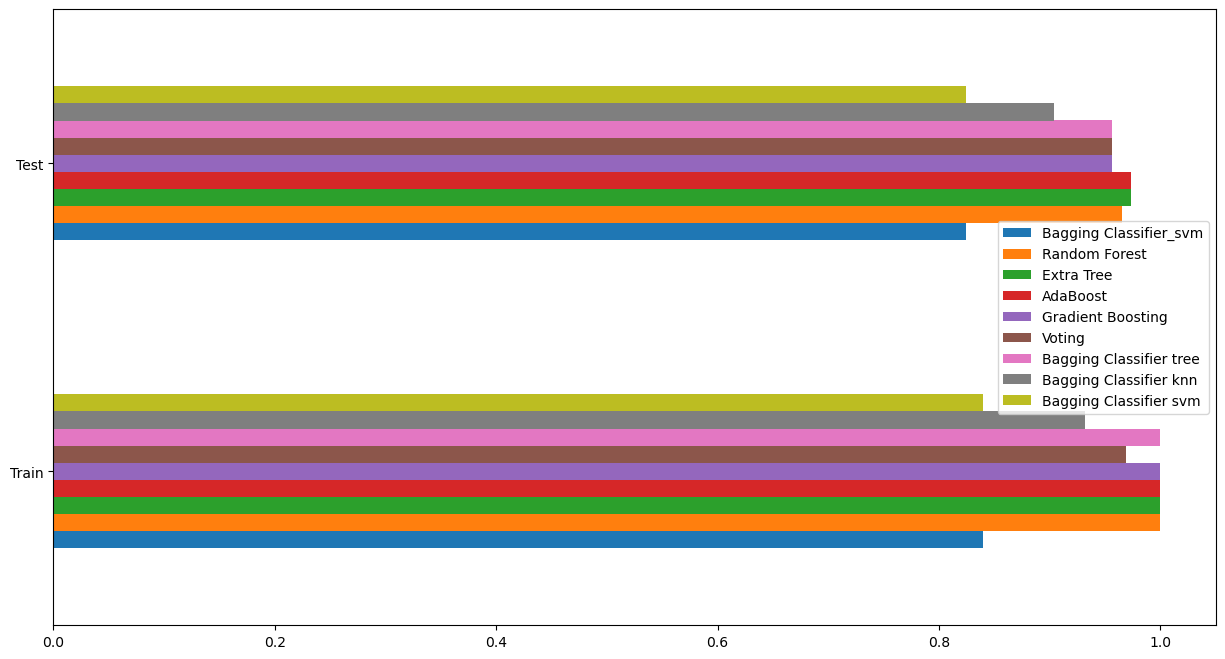

In [110]:
scores_df = pd.DataFrame(scores)

scores_df.plot(kind='barh', figsize=(15, 8))

### the above code was taken from the Kaggle(Ensemble ML Algorithms : Bagging, Boosting, Voting) https://www.kaggle.com/code/faressayah/ensemble-ml-algorithms-bagging-boosting-voting

## Evaluation of the models put together

The machine learning models used here are: Bagging, Random Forest, Extra tree, Adaboost and Gradient Boosting. From the bagging classifier three different estimators are used to determine its performance accuracy. It is seen that the bagging classifier with the estimator 'Tree' has a higher overall accuracy score compared to 'support vector machine' and 'K-nearest neighbor' estimators. 
As seen from the from the graph given above, that adaboost has higher overall accuracy score compared to gradient boosting, same with extra tree compared to random forest. These overall accuracy scores are seen from the test results
The voting classiefier results tells you that it trained all the base models to improve the performance of the this machine learning model. The overall improvement to the model from voting is very good which is above the 0.9.
Overall, the model performs well on both the training and testing data, with high accuracy scores. However, there is a slight drop in performance on the testing data compared to the training data, which is expected. The classification report provides more detailed information about the model's performance for each class, including precision, recall, and F1-score.